In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
for row in session.query(Measurement.date, Measurement.prcp, Measurement.station, Station.name).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').limit(10):
    print (row) 
# Calculate the date 1 year ago from today

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


('2016-08-23', 0.0, 'USC00519397', 'WAIKIKI 717.2, HI US')
('2016-08-23', 0.0, 'USC00519397', 'KANEOHE 838.1, HI US')
('2016-08-23', 0.0, 'USC00519397', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('2016-08-23', 0.0, 'USC00519397', 'PEARL CITY, HI US')
('2016-08-23', 0.0, 'USC00519397', 'UPPER WAHIAWA 874.3, HI US')
('2016-08-23', 0.0, 'USC00519397', 'WAIMANALO EXPERIMENTAL FARM, HI US')
('2016-08-23', 0.0, 'USC00519397', 'WAIHEE 837.5, HI US')
('2016-08-23', 0.0, 'USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US')
('2016-08-23', 0.0, 'USC00519397', 'MANOA LYON ARBO 785.2, HI US')
('2016-08-24', 0.08, 'USC00519397', 'WAIKIKI 717.2, HI US')


In [11]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date.desc()).all()

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
date = [result[0] for result in results[:]]
prcp = [result[1] for result in results[:]]

results_df = pd.DataFrame(results[:], columns =['date', 'prcp'])
results_df.shape

(2230, 2)

In [13]:
results_df.dtypes

date     object
prcp    float64
dtype: object

In [14]:
results_df['date'] = pd.to_datetime(results_df.date)

In [15]:
results_df.dtypes

date    datetime64[ns]
prcp           float64
dtype: object

In [16]:
results_df.to_csv('results_df2.csv', index=False)

In [17]:
import matplotlib.dates as mdates
import seaborn as sns

In [18]:
results_plot_df = pd.read_csv('results_df2.csv', usecols=['date','prcp'], parse_dates=['date'])
results_plot_df.set_index('date', inplace=True)
results_plot_df.head()
results_plot_df.shape

(2230, 1)

In [19]:
results_plot_df.dtypes

prcp    float64
dtype: object

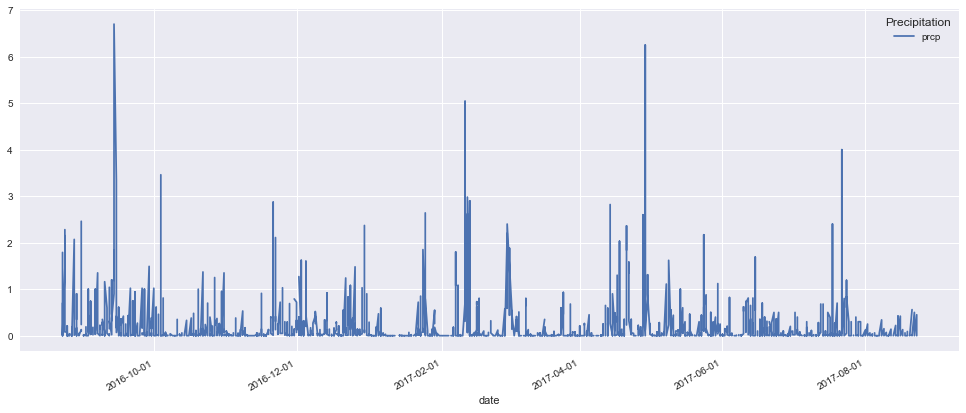

In [20]:
sns.set()
fig, ax = plt.subplots(figsize=(15,7))
results_plot_df.plot(ax=ax)
plt.legend(title="Precipitation", fancybox=True)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# How many stations are available in this dataset?
print("The total number of stations:", session.query(Station.station).count())

The total number of stations: 9


In [23]:
# What are the most active stations?
# List the stations and the counts in descending order.
print('The Station with the highest number of observtations is USC00519281.')
session.query(Measurement.station, func.count(Measurement.station).label("most_active_stations"))\
    .group_by(Measurement.station).order_by("most_active_stations DESC").all()  

The Station with the highest number of observtations is USC00519281.


C:\Users\drmar\Anaconda3\envs\pythondata\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'most_active_stations DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
for row in session.query(Measurement.date, Measurement.tobs, Measurement.station, Station.name).filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').limit(10):
    print (row)   

('2016-08-23', 81.0, 'USC00519397', 'WAIKIKI 717.2, HI US')
('2016-08-23', 81.0, 'USC00519397', 'KANEOHE 838.1, HI US')
('2016-08-23', 81.0, 'USC00519397', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('2016-08-23', 81.0, 'USC00519397', 'PEARL CITY, HI US')
('2016-08-23', 81.0, 'USC00519397', 'UPPER WAHIAWA 874.3, HI US')
('2016-08-23', 81.0, 'USC00519397', 'WAIMANALO EXPERIMENTAL FARM, HI US')
('2016-08-23', 81.0, 'USC00519397', 'WAIHEE 837.5, HI US')
('2016-08-23', 81.0, 'USC00519397', 'HONOLULU OBSERVATORY 702.2, HI US')
('2016-08-23', 81.0, 'USC00519397', 'MANOA LYON ARBO 785.2, HI US')
('2016-08-24', 79.0, 'USC00519397', 'WAIKIKI 717.2, HI US')


In [28]:
tobs_results = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
filter(Measurement.date <= '2017-08-23').\
filter(Measurement.date >= '2016-08-23').\
order_by(Measurement.date.desc()).all()

In [29]:
tobs_results2= session.query(Measurement.station, Measurement.tobs, func.count(Measurement.tobs).\
    label("highest_observations")).\
    group_by(Measurement.tobs).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    order_by("highest_observations DESC").all() 
tobs_results2

C:\Users\drmar\Anaconda3\envs\pythondata\lib\site-packages\sqlalchemy\sql\compiler.py:643: SAWarning: Can't resolve label reference 'highest_observations DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


[('USC00516128', 77.0, 212),
 ('USC00516128', 76.0, 210),
 ('USC00516128', 78.0, 198),
 ('USC00516128', 74.0, 174),
 ('USC00516128', 75.0, 171),
 ('USC00516128', 79.0, 158),
 ('USC00516128', 80.0, 156),
 ('USC00516128', 72.0, 125),
 ('USC00516128', 71.0, 121),
 ('USC00516128', 73.0, 117),
 ('USC00516128', 70.0, 110),
 ('USC00516128', 69.0, 92),
 ('USC00519281', 81.0, 89),
 ('USC00516128', 68.0, 56),
 ('USC00516128', 67.0, 54),
 ('USC00516128', 82.0, 42),
 ('USC00516128', 66.0, 31),
 ('USC00516128', 65.0, 28),
 ('USC00516128', 64.0, 23),
 ('USC00519281', 63.0, 15),
 ('USC00519281', 62.0, 13),
 ('USC00519281', 83.0, 12),
 ('USC00516128', 60.0, 6),
 ('USC00519523', 84.0, 6),
 ('USC00519281', 61.0, 4),
 ('USC00519281', 59.0, 3),
 ('USC00517948', 87.0, 2),
 ('USC00516128', 58.0, 1),
 ('USC00519523', 85.0, 1)]

In [32]:
date_tobs = [t[0] for t in tobs_results[:]]

station_tobs3 = [t[1] for t in tobs_results[:]]

tobs4 = [t[2] for t in tobs_results[:]]

In [33]:
tobs_all_df = pd.DataFrame(tobs_results[:], columns=['date', 'station', 'tobs'])
tobs_all_df.head()
tobs_all_df.shape

(2230, 3)

In [34]:
plot_tobs2 = tobs_all_df[['tobs']]
plot_tobs2.sort_values('tobs', ascending=True).head()
plot_tobs2.shape

(2230, 1)

<Figure size 432x288 with 0 Axes>

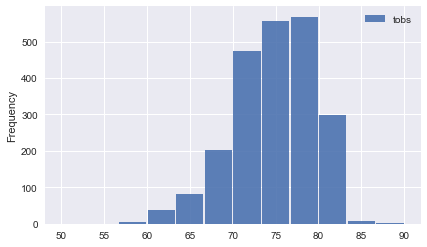

In [36]:
sns.set()
plt.figure()
plot_tobs2.plot.hist(alpha=0.9, range=[50, 90], bins=12, rwidth=0.95)

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
calc_temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.tobs.desc()).all()

calc_temps

[(62.0, 69.57142857142857, 74.0)]


In [17]:
weather_vacation = session.query(Measurement.tobs).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.tobs.desc()).all()

weather_vacation

weather_vacation_list = list(np.ravel(weather_vacation))
np.mean(weather_vacation_list)


62.0 68.36585365853658 74.0


In [37]:
max_temps = session.query(func.max(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

max_temps

max_temps_list = list(np.ravel(max_temps))
max_temps_list

[85.0]

In [38]:
min_temps = session.query(func.min(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

min_temps

min_temps_list = list(np.ravel(min_temps))
min_temps_list

[71.0]

In [39]:
avg_temps = session.query(func.avg(Measurement.tobs)).filter(Measurement.date <= '2017-08-22').\
filter(Measurement.date >= '2017-08-17').\
order_by(Measurement.date.desc()).all()

avg_temps

avg_temps_list = list(np.ravel(avg_temps))
avg_temps_list

[78.77272727272727]

In [40]:
maxtemps = max_temps_list[0]
mintemps = min_temps_list[0]
avgtemps = avg_temps_list[0]

maxtemps
mintemps
avgtemps.round()

errorbar = maxtemps - mintemps
errorbar

14.0

In [41]:
weather_data = {'maxtemps': [maxtemps],
               'mintemps': [mintemps],
               'avgtemps': [avgtemps.round()],
               'errorbar': [errorbar]}
weather_df = pd.DataFrame(weather_data, columns = ['maxtemps', 'mintemps', 'avgtemps', 'errorbar'])
weather_df

,maxtemps,mintemps,avgtemps,errorbar
0,85.0,71.0,79.0,14.0


In [42]:
yerr = errorbar

Text(0.5,1,'Trip Avg Temp')

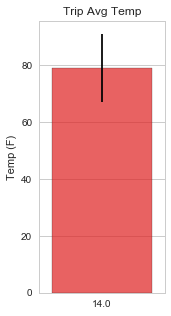

In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
sns.set_style("whitegrid")
plt.figure(figsize=(2,5))
ax = sns.barplot(x= "errorbar", y= "avgtemps", color="r", ci=95, edgecolor = 'black', yerr = 12, capsize=7,
                 alpha=0.7, data=weather_df)

ax.set_ylabel("Temp (F)")
ax.set_xlabel('')
plt.title("Trip Avg Temp")